In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [26]:
df = pd.read_csv('AccidentesBicicletas_2019_2020_2021-with-links.csv')
df.head()

,num_expediente,DateTime,localizacion,numero,distrito,distrito_wikidata,loc_rec,localizacion_wikidata,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,positiva_alcohol
0,2019S000036,2019-02-01T20:45:00Z,AVDA_GRAN_VIA_DE_HORTALEZA__GTA_LUIS_ROSALES,65B,Hortaleza,https://wikidata.org/entity/Q1928529,AVENIDA GRAN VIA DE HORTALEZA,NaN,Colisión fronto-lateral,Despejado,Bicicleta,Conductor,De 70 a 74 años,Hombre,3.0,N
1,2019S000045,2019-03-01T10:30:00Z,CTRA_DEHESA_DE_LA_VILLA,1,Moncloa-Aravaca,https://wikidata.org/entity/Q2017682,Dehesa de la Villa,https://wikidata.org/entity/Q4887686,Caída,Despejado,Bicicleta,Conductor,De 15 a 17 años,Hombre,2.0,N
2,2019S000132,2019-03-01T12:45:00Z,AVDA_SANTA_EUGENIA__CALL_REAL_DE_ARGANDA,64,Villa de Vallecas,https://wikidata.org/entity/Q1947988,AVENIDA SANTA EUGENIA,NaN,Alcance,Despejado,Bicicleta,Conductor,De 18 a 20 años,Hombre,7.0,N
3,2019S000133,2019-03-01T14:30:00Z,CALL_FELIPE_ALVAREZ,10,Villa de Vallecas,https://wikidata.org/entity/Q1947988,Felipe Alvarez Bengochea,https://wikidata.org/entity/Q56753025,Alcance,Se desconoce,Bicicleta,Conductor,De 15 a 17 años,Hombre,7.0,N
4,2019S000306,2019-04-01T17:10:00Z,CALL_PRADILLO,26,Chamartín,https://wikidata.org/entity/Q1766348,calle de Pradillo,https://wikidata.org/entity/Q55868790,Colisión fronto-lateral,Despejado,Bicicleta,Conductor,De 30 a 34 años,Hombre,7.0,N


# Plots of accidents ordered by different criteria

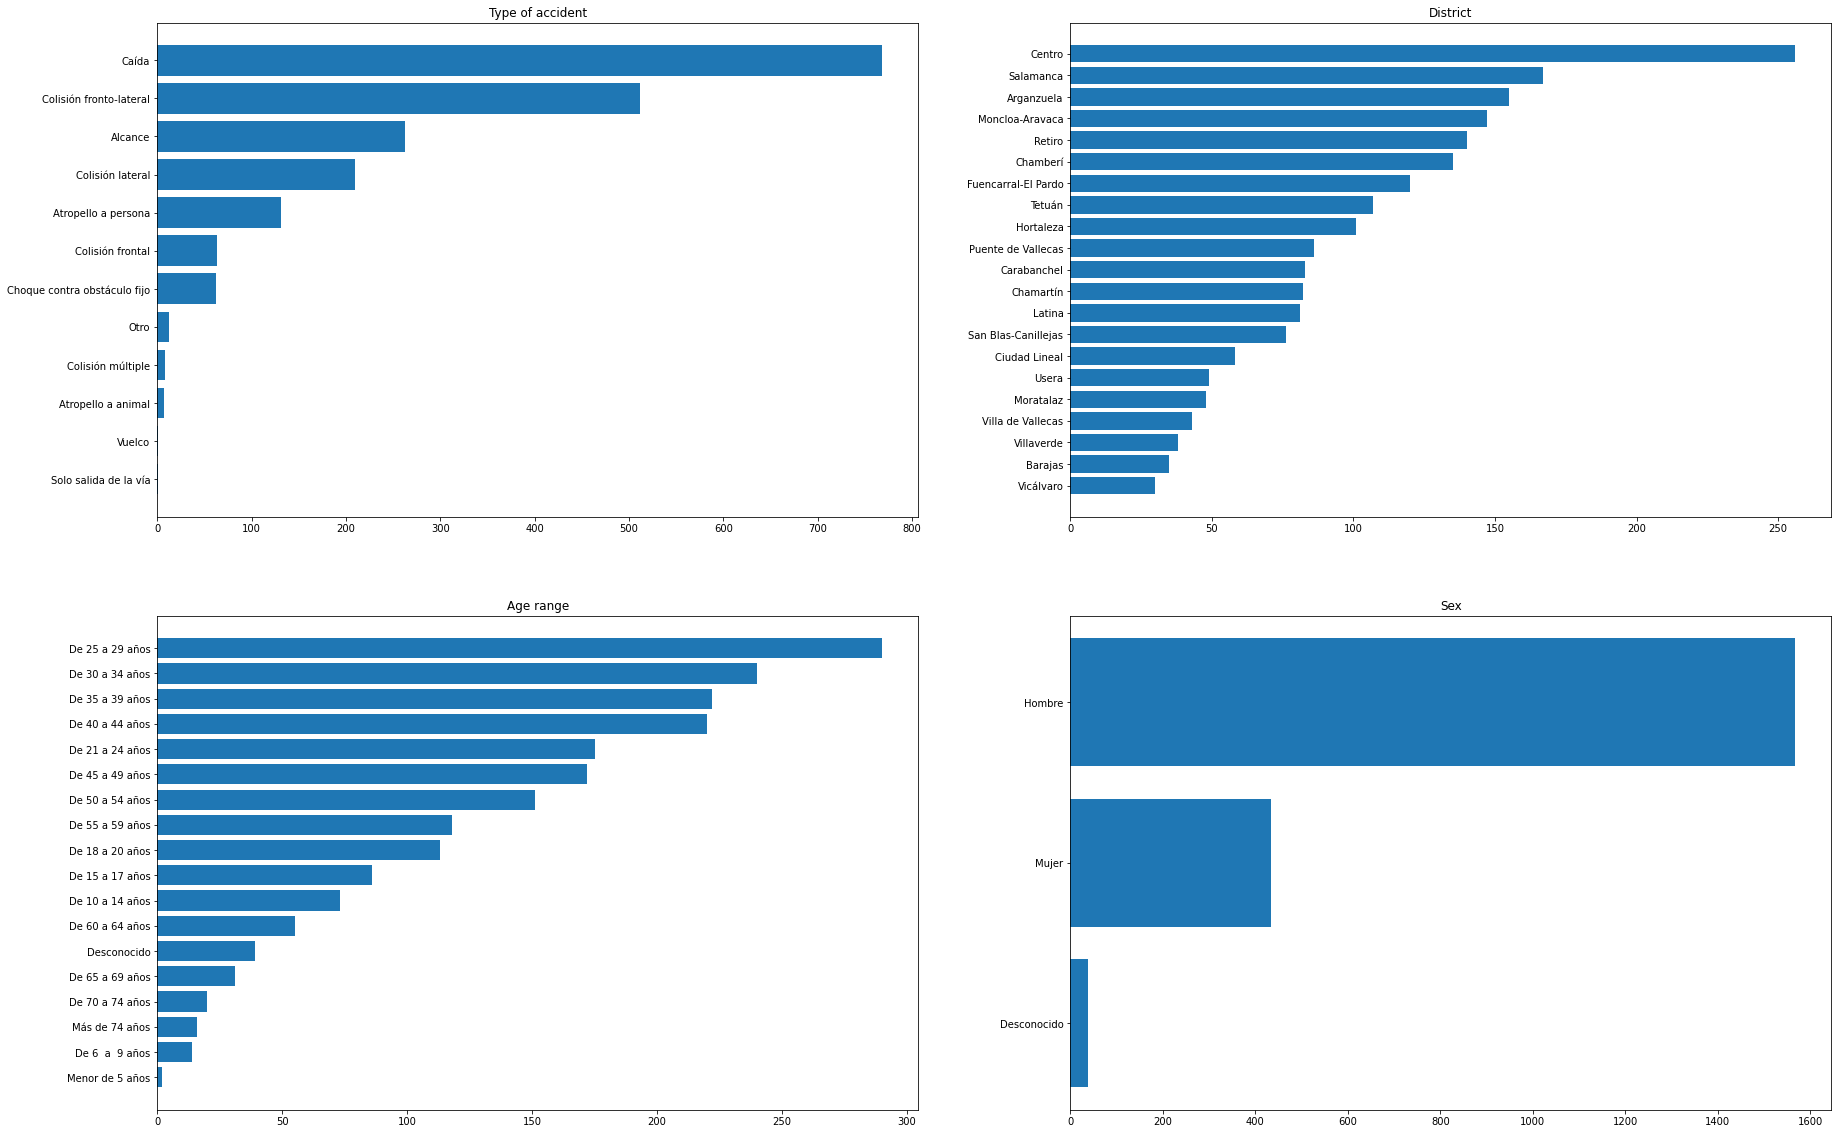

In [5]:
# plt.hist(df['tipo_accidente'],orientation='horizontal',rwidth=0.7)
plt.figure(figsize=[30,20])

plt.subplot(221)
plt.title('Type of accident')
labels, counts = np.unique(df['tipo_accidente'], return_counts=True)
sort_arr = np.argsort(counts)
plt.barh(labels[sort_arr], counts[sort_arr], align='center')

plt.subplot(222)
plt.title('District')
labels, counts = np.unique(df['distrito'], return_counts=True)
sort_arr = np.argsort(counts)
plt.barh(labels[sort_arr], counts[sort_arr], align='center')

plt.subplot(223)
plt.title('Age range')
labels, counts = np.unique(df['rango_edad'], return_counts=True)
sort_arr = np.argsort(counts)
plt.barh(labels[sort_arr], counts[sort_arr], align='center')

plt.subplot(224)
plt.title('Sex')
labels, counts = np.unique(df['sexo'], return_counts=True)
sort_arr = np.argsort(counts)
plt.barh(labels[sort_arr], counts[sort_arr], align='center')

plt.savefig("img/static_plots.png")

In [6]:
# Auxiliar functions to order the dates

# Assigns each date a number
def weight(date):
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])
    return day + 32*month + 32*12*year

# Is older date1 than date2?
def past_date(date1, date2):
    weight1 = weight(date1)
    weight2 = weight(date2)
    if weight1 < weight2:
        return True
    else:
        return False

# Animation (don't execute, it takes some hours)

In [ ]:
plt.figure(figsize=[50,30])
fig, ax = plt.subplots()

# Obtaining district and its counters (initially all in 0)
labels = np.unique(df['distrito'])
accidents = {}
for lab in labels:
    accidents[lab] = 0

# Initial histogram
hst = plt.barh(labels, np.zeros(len(labels)))
frames = np.array(np.unique(df['DateTime'])) # All the different dates in the dataset
# frames = sorted(frames,key=weight)

# def init():
#     return hst

# Update function defines how the plot is modified
def update(frame):
    new_accidents = df[list(df['DateTime']==frame)]
    # Group by and count the accidents in each district in a certain day (day = frame)
    grp = new_accidents.groupby(['distrito']).size().reset_index(name='counts')
    # Adding the accidents of the district to our counter
    for index,dist in grp.iterrows():
        accidents[dist['distrito']] += dist['counts']
    # Displaying the new histogram, ordered by number of accidents
    sort_arr = np.argsort(list(accidents.values()))
    plt.barh(np.array(list(accidents.keys()))[sort_arr], np.array(list(accidents.values()))[sort_arr], align='center', color='blue')

ani = FuncAnimation(fig, update, frames=frames, interval = 10) #Interval is in miliseconds
ani.save("img/img.gif")


# SPARQL Queries

In [7]:
city = df[['distrito','distrito_wikidata']]
city = city.drop_duplicates().to_numpy()
city

array([['Hortaleza', 'https://wikidata.org/entity/Q1928529'],
       ['Moncloa-Aravaca', 'https://wikidata.org/entity/Q2017682'],
       ['Villa de Vallecas', 'https://wikidata.org/entity/Q1947988'],
       ['Chamartín', 'https://wikidata.org/entity/Q1766348'],
       ['Moratalaz', 'https://wikidata.org/entity/Q2076109'],
       ['Salamanca', 'https://wikidata.org/entity/Q1773521'],
       ['Fuencarral-El Pardo', 'https://wikidata.org/entity/Q656196'],
       ['Centro', 'https://wikidata.org/entity/Q1763376'],
       ['Carabanchel', 'https://wikidata.org/entity/Q1001991'],
       ['Arganzuela', 'https://wikidata.org/entity/Q2000929'],
       ['Latina', 'https://wikidata.org/entity/Q794954'],
       ['Ciudad Lineal', 'https://wikidata.org/entity/Q1763694'],
       ['Chamberí', 'https://wikidata.org/entity/Q1763370'],
       ['Retiro', 'https://wikidata.org/entity/Q2002296'],
       ['San Blas-Canillejas', 'https://wikidata.org/entity/Q2001937'],
       ['Tetuán', 'https://wikidata.org/e

In [8]:
# Innitializing some libraries
from rdflib import Graph, Namespace, Literal
from rdflib.plugins.sparql import prepareQuery
g = Graph()

# g.parse(city)
# g.parse("http://query.wikidata.org/sparql")

WD = Namespace("http://www.wikidata.org/entity/")
WDT = Namespace("http://www.wikidata.org/prop/direct/")
RDF = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")

In [9]:
# pip install sparqlwrapper
# Obtaining habitants in each district
import sys
from SPARQLWrapper import SPARQLWrapper, JSON


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

def ret_population(link):
    num = link.split('/')[-1]
    endpoint_url = "https://query.wikidata.org/sparql"

    query = """SELECT ?Population WHERE { 
         wd:%s wdt:P1082 ?Population. 
      }""" % num

    results = get_results(endpoint_url, query)

    for result in results["results"]["bindings"]:
        return result['Population']['value']

city_dict = {}
for arr in city:
    popul = str(ret_population(arr[1]))
    city_dict[arr[0]] = popul
    print(arr[0] + ': ' + popul)

Hortaleza: 180462
Moncloa-Aravaca: 116903
Villa de Vallecas: 107649
Chamartín: 143424
Moratalaz: 94197
Salamanca: 143800
Fuencarral-El Pardo: 238756
Centro: 131928
Carabanchel: 243998
Arganzuela: 151965
Latina: 233808
Ciudad Lineal: 212529
Chamberí: 137401
Retiro: 118516
San Blas-Canillejas: 154357
Tetuán: 153789
Puente de Vallecas: 240867
Vicálvaro: 75485
Usera: 142894
Barajas: 46876
Villaverde: 149003


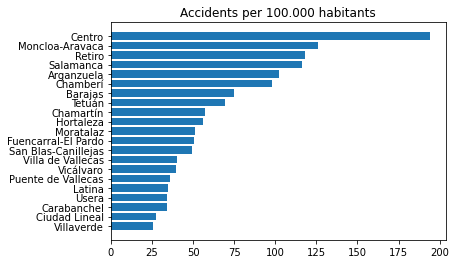

In [10]:
# Plot of the previous results
labels, counts = np.unique(df['distrito'], return_counts=True)
counts = counts.astype(float)
for idx,lab in enumerate(labels):
    counts[idx] /= float(city_dict[lab])
counts = counts * 100000
sort_arr = np.argsort(counts)
plt.title('Accidents per 100.000 habitants')
plt.barh(labels[sort_arr], counts[sort_arr], align='center')
plt.savefig('img/perhabitant.png')

In [11]:
# Same functions but for the area and boundaries (boundaries are incomplete)
def ret_area(link):
    num = link.split('/')[-1]
    endpoint_url = "https://query.wikidata.org/sparql"

    query = """SELECT ?Population WHERE { 
         wd:%s wdt:P2046 ?Population. 
      }""" % num

    results = get_results(endpoint_url, query)

    for result in results["results"]["bindings"]:
        return result['Population']['value']

def ret_boundaries(link):
    num = link.split('/')[-1]
    endpoint_url = "https://query.wikidata.org/sparql"

    query = """SELECT ?Population WHERE { 
         wd:%s wdt:P47 ?Population. 
      }""" % num

    results = get_results(endpoint_url, query)

    for result in results["results"]["bindings"]:
        return result['Population']

print(float(ret_area('https://wikidata.org/entity/Q1928529')))

27.4197624962822


In [27]:
districts = list(city[:,0])
links = list(city[:,1])
areas = [ret_area(x) for x in links]
pops = [ret_population(x) for x in links]
labels, counts = np.unique(df['distrito'], return_counts=True)
labels = list(labels)
accidents = [counts[labels.index(x)] for x in districts]

dataframe = pd.DataFrame({'District':districts,
                          'Num_Accidents':accidents,
                          'Population':pops,
                          'Area':areas})

In [28]:
dataframe.head()
dataframe.to_csv('wikidata.csv',index=False)

Analyzing the new dataframe

In [77]:
df = pd.read_csv('wikidata.csv')
df = df[df['District']!='Fuencarral-El Pardo']
df['District'].iloc[:]
df.head(10)

,District,Num_Accidents,Population,Area
0,Hortaleza,101,180462,27.419762
1,Moncloa-Aravaca,147,116903,46.531136
2,Villa de Vallecas,43,107649,51.467238
3,Chamartín,82,143424,9.175482
4,Moratalaz,48,94197,6.344200
5,Salamanca,167,143800,5.392404
7,Centro,256,131928,5.228200
8,Carabanchel,83,243998,14.048316
9,Arganzuela,155,151965,6.462176
10,Latina,81,233808,25.427203


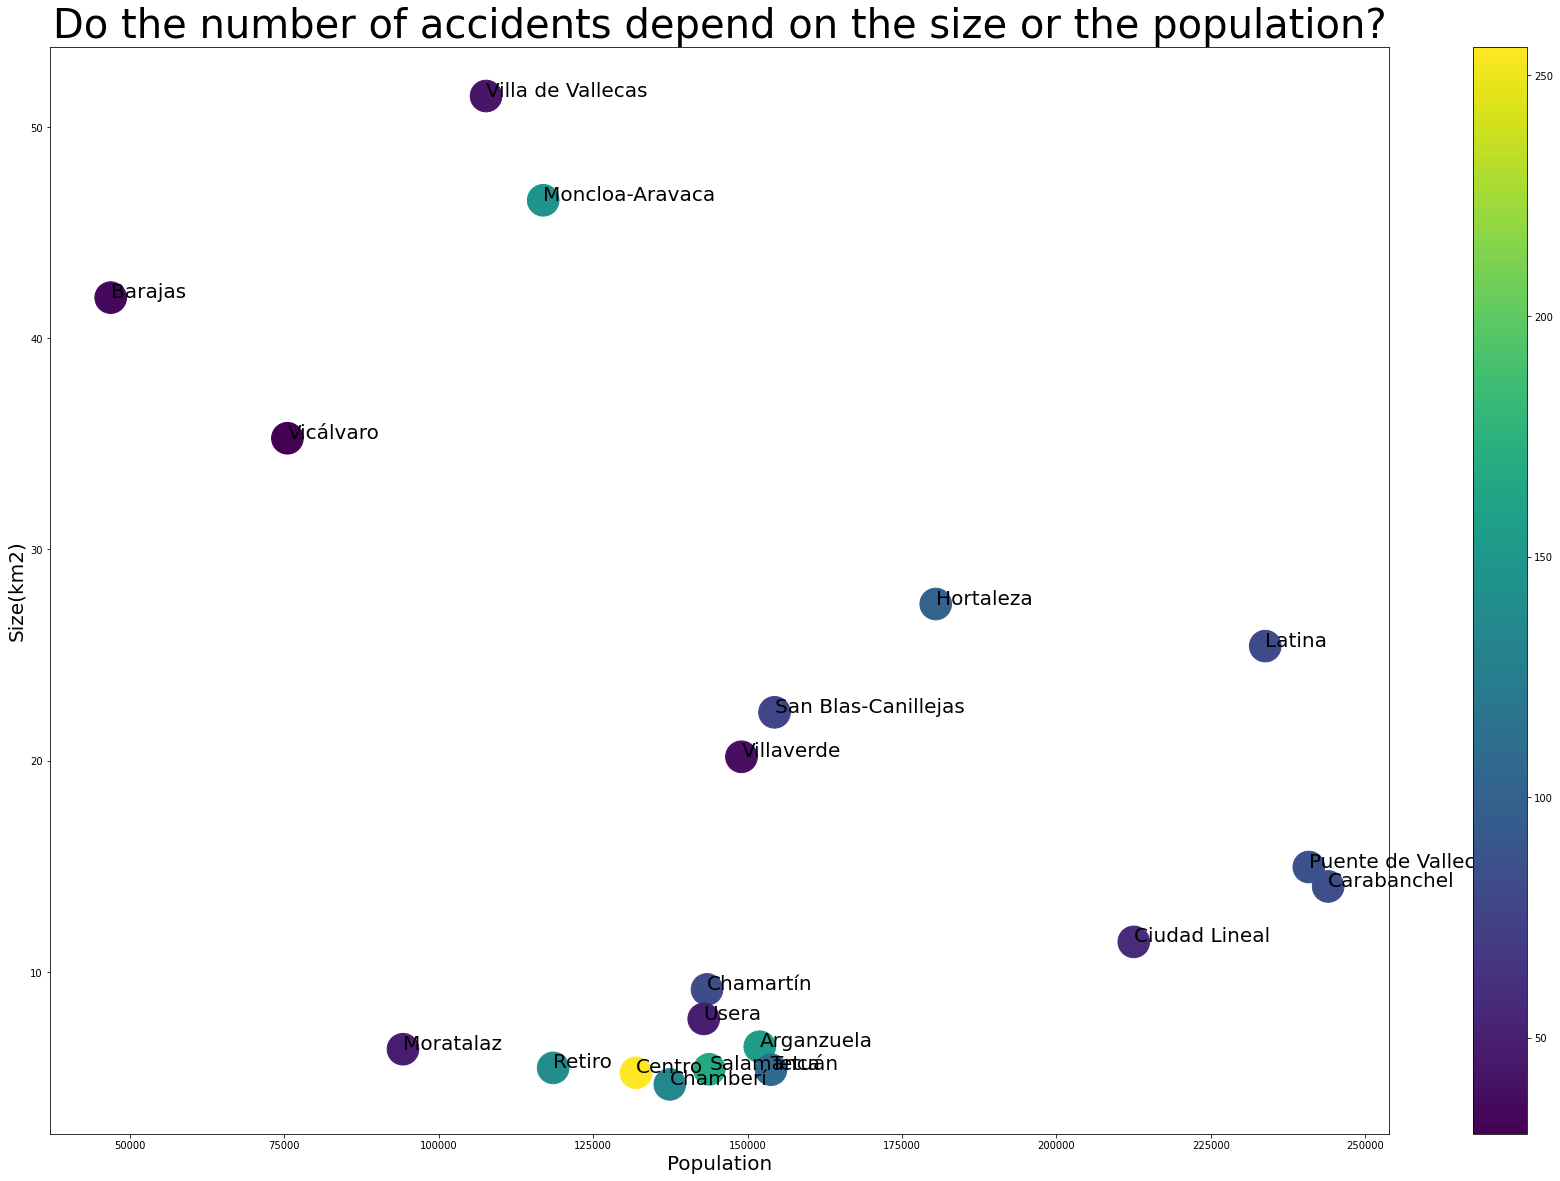

In [82]:
x = list(df['Population'])
y = list(df['Area'])
colors = list(df['Num_Accidents'])
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.figure(figsize=[30,20])
scatter = plt.scatter(x, y, c=colors, s=400)

for i, txt in enumerate(list(df['District'])):
    plt.annotate(txt, (x[i], y[i]), fontsize=20)

plt.title('Do the number of accidents depend on the size or the population?',size=40)
plt.xlabel('Population',size=20)
plt.ylabel('Size(km2)',size=20)
plt.colorbar(scatter)
plt.savefig('img/heatmap.png')